<a href="https://colab.research.google.com/github/arocavanaclocha/public/blob/main/GoogleKeywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [1]:
!git clone https://github.com/arocavanaclocha/public.git
!pip install pytrends
!python /content/public/core/GoogleTrends.py
#!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

Cloning into 'public'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.




*   [PyTrends](https://github.com/GeneralMills/pytrends#installation)
*   [My core libs](https://github.com/arocavanaclocha/public/blob/main/core/GoogleTrends.py)



* [Trends categories](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)
* [Time series 1](https://github.com/2wavetech/How-to-Check-if-Time-Series-Data-is-Stationary-with-Python)
*  [Time series 2](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)


# Analyze several keywords

In [6]:
#@title Set keywords
#@markdown Execute play after modifying fileds.
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
import pandas as pd
import matplotlib

import public.core.GoogleTrends as GTRENDS


#@markdown ......


plt.style.use('seaborn-darkgrid')
#matplotlib.rcParams['font.family'] = ['Heiti TC']
def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)

def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)


start_date = '2015-01-01' #@param {type:"date"}
end_date    = '2021-01-15' #@param {type:"date"}
category    = 'All'  #@param ["All", "Beauty & Fitness", "Home & Garden", "Bathroom"]

cats={
    "All":0,
    "Beauty & Fitness": 44,
    "Home & Garden":11,
    "Bathroom": 1365
    }
show_totals = False #@param {type:"boolean"}
geo         = '' #@param ["", "es", "de"]
gprop       = '' #@param [""]
keyword1 = 'bathroom mirror' #@param {type:"string"}
keyword2 = 'badspiegel' #@param {type:"string"}
keyword3 = 'espejo de ba\xF1o' #@param {type:"string"}
keyword4 = '' #@param {type:"string"}
keyword5 = '' #@param {type:"string"}

keywords=[keyword1, keyword2, keyword3, keyword4, keyword5]
keywords = [x for x in keywords if x != '']

category = cats[category]
timeframe   = GTRENDS.getTimeFrame(start_date, end_date) # timeframe = 'today 12-m'


In [ ]:
#keywords=['makeup vanity', 'makeup mirror']
#, 'espejo de maquillaje'] #'cosmetic mirror', Desktop mirror, vanity mirror, 'beauty mirror', 'portable Mirror', 'magnifier mirror'
#keywords=['Espejo de aumento', 'espejo de tocador', 'espejo de maquillaje']
#'kosmetikspiegel', 
#keywords=['cosmetic mirror','beauty mirror', 'makeup mirror']

## Analytics

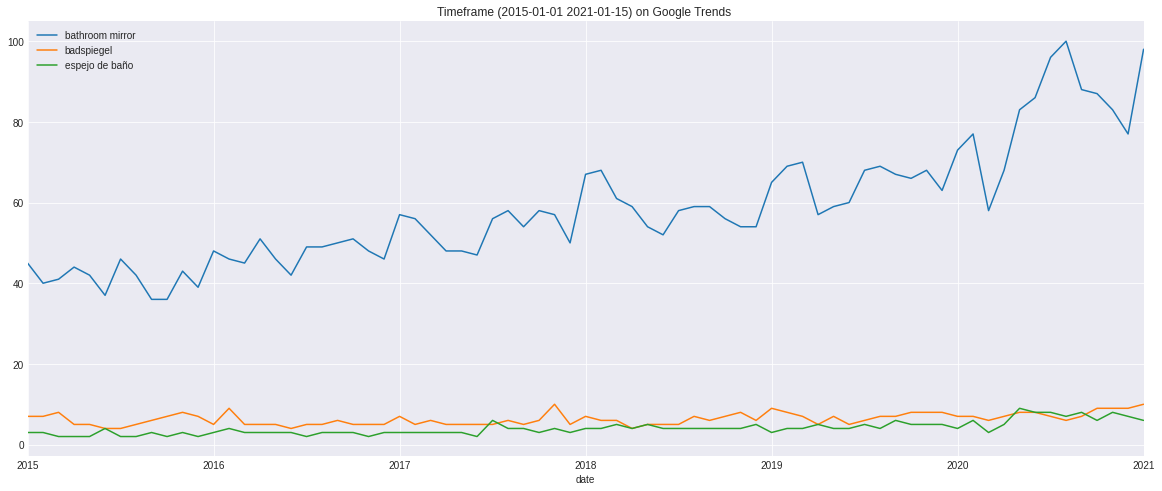

In [7]:
df = GTRENDS.show_keywords_trends(
                      keywords=keywords,
                      timeframe = timeframe,
                      show_totals = show_totals, 
                      category = category,
                      geo=geo, 
                      gprop=gprop
                    )

trends = GTRENDS.TrendReq ()

trends.build_payload( kw_list=keywords, 
                      timeframe = timeframe,
                      cat = category,
                      geo=geo, 
                      gprop=gprop
                    )
interest_over_time = trends.interest_over_time()
interest_over_time= interest_over_time.drop(labels=['isPartial'],axis='columns')
#image = interest_over_time.plot(title = f'KEYWORDS({keywords}) in last ({timeframe}) on Google Trends ').get_figure()

In [8]:
interest_by_region = trends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
for kw in keywords:
  print((interest_by_region.sort_values(by=[kw], ascending=False))[kw].head(25))

geoName
Singapore       100
Czechia         100
New Zealand     100
Nigeria         100
Kenya           100
Canada          100
Taiwan          100
Kazakhstan      100
Greece          100
Jamaica         100
Ireland         100
Iran            100
Sri Lanka       100
India           100
Lebanon         100
South Africa    100
Norway          100
Hungary         100
Egypt           100
Hong Kong       100
Pakistan        100
Saudi Arabia    100
Finland         100
Philippines     100
Romania         100
Name: bathroom mirror, dtype: int64
geoName
Austria                     100
Germany                      98
Switzerland                  72
Netherlands                  22
St. Helena                   19
Italy                        16
Poland                       16
France                       11
Japan                        10
Turkey                        8
Russia                        6
Thailand                      5
Brazil                        5
Vietnam                       5


In [9]:
for kw in keywords:
  suggestions = trends.suggestions(kw)
  print(f'Keyword: {kw}')
  print(suggestions)

Keyword: bathroom mirror
[{'mid': '/g/11h79tyyjr', 'title': 'Bathroom Mirror', 'type': 'Topic'}]
Keyword: badspiegel
[{'mid': '/g/11gk66h27x', 'title': 'IKEA NISSEDAL Mirror White (40x150 cm) 303.203.16', 'type': 'Topic'}]
Keyword: espejo de baño
[{'mid': '/g/11h79tyyjr', 'title': 'Bathroom Mirror', 'type': 'Topic'}]


In [10]:
related_topics = trends.related_topics()
print(related_topics)
#topics[kw]['top']
#topics[keyword]['rising']


{}


In [12]:
related_queries = trends.related_queries()

print("TOP RELATED QUERIES")
for kw in keywords:
  print(f'Keyword: {kw}')
  print(related_queries[kw]['top'])

TOP RELATED QUERIES
Keyword: bathroom mirror
                       query  value
0    bathroom cabinet mirror    100
1           bathroom cabinet     98
2             mirror cabinet     97
3        mirror for bathroom     81
4           bathroom mirrors     81
5         mirror in bathroom     80
6                    mirrors     79
7              vanity mirror     75
8     bathroom vanity mirror     74
9            bathroom vanity     73
10      bathroom wall mirror     67
11     bathroom mirror light     54
12            bathroom light     53
13           bathroom lights     45
14       bathroom mirror led     44
15    bathroom mirror lights     43
16                led mirror     40
17  bathroom cabinets mirror     36
18         bathroom cabinets     34
19            bathroom ideas     31
20             ikea bathroom     31
21     bathroom mirror ideas     31
22     white bathroom mirror     30
23      ikea bathroom mirror     30
24               ikea mirror     29
Keyword: badspiegel

In [ ]:
print("RISING RELATED QUERIES")

for kw in keywords:
  print(f'Keyword: {kw}')
  print(related_queries[kw]['rising'])

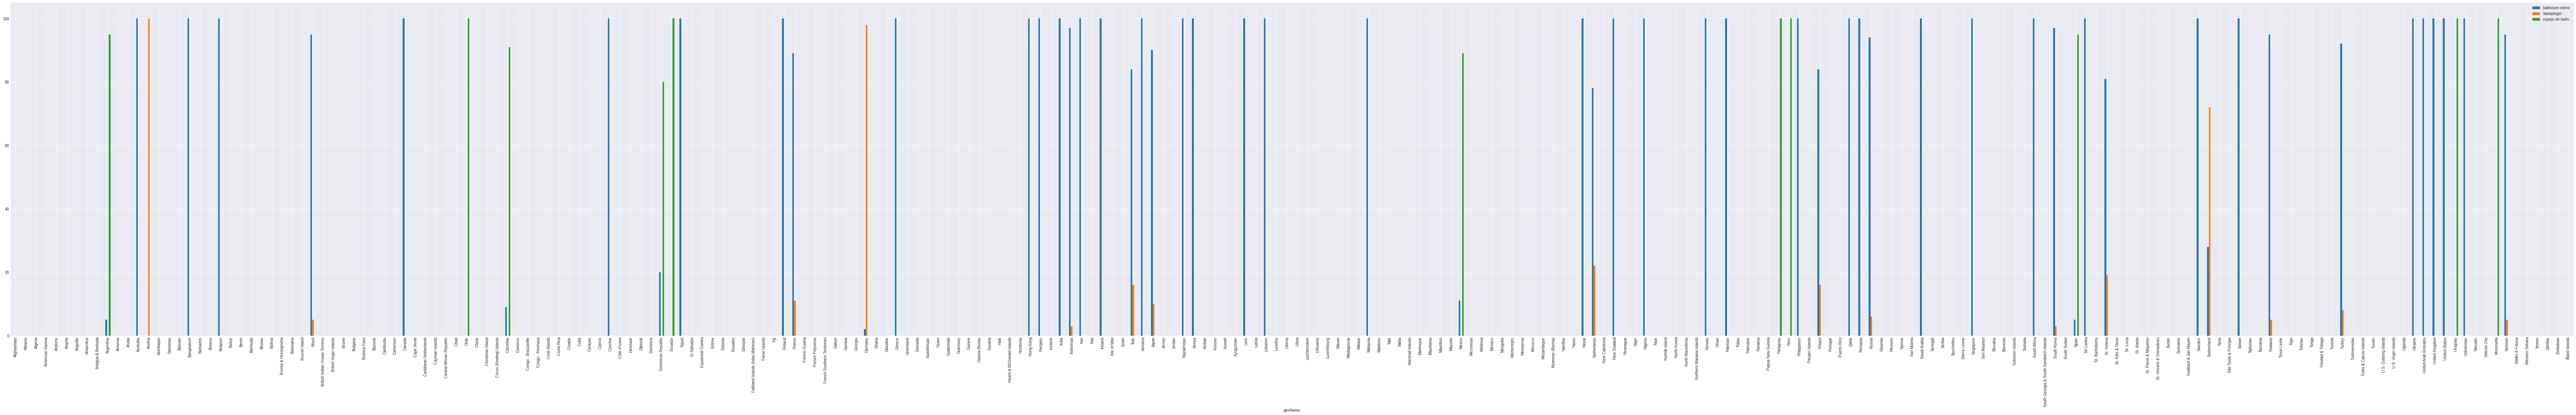

In [13]:
interest_by_region.reset_index().plot(x="geoName", y=keywords, figsize=(120,16), kind="bar")
plt.show()

## Time series decomposition 
Time series decomposition (base level, trend, seasonal index and residual)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


bathroom mirror


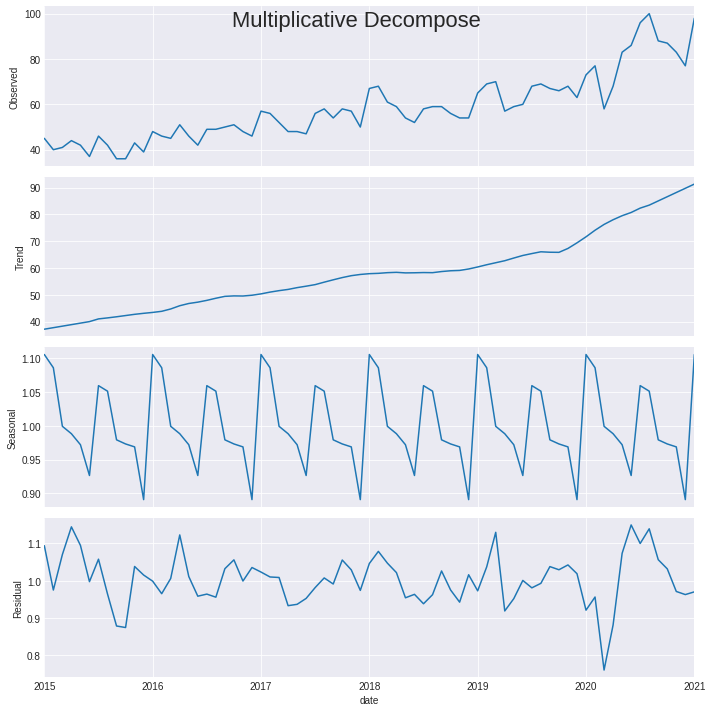

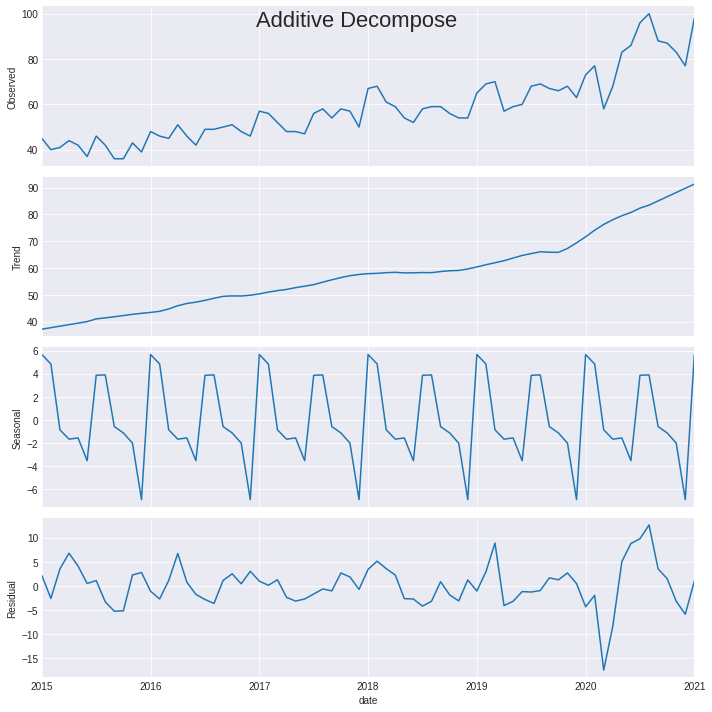

badspiegel


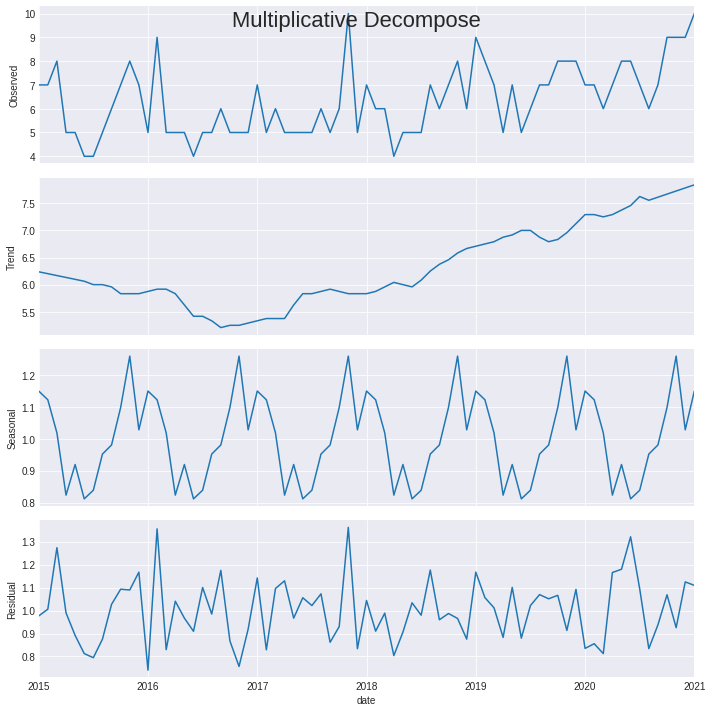

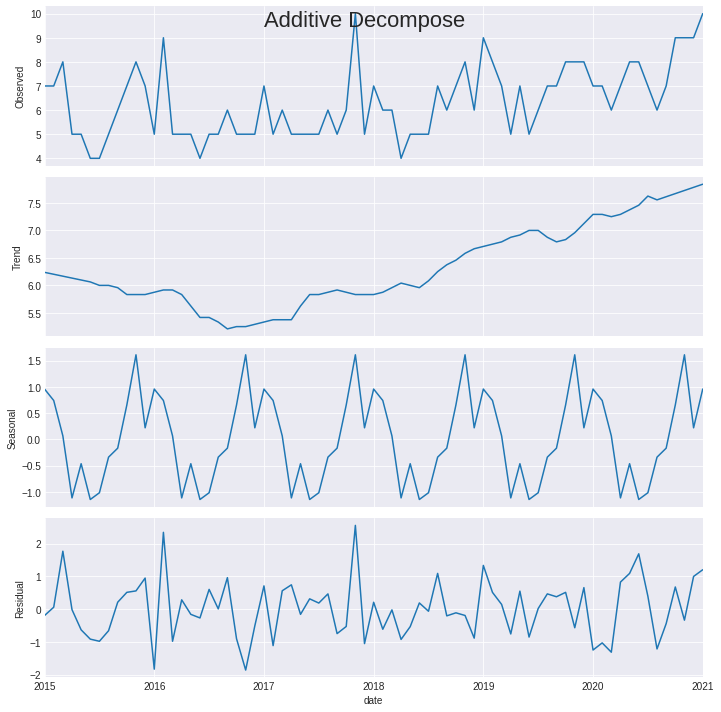

espejo de baño


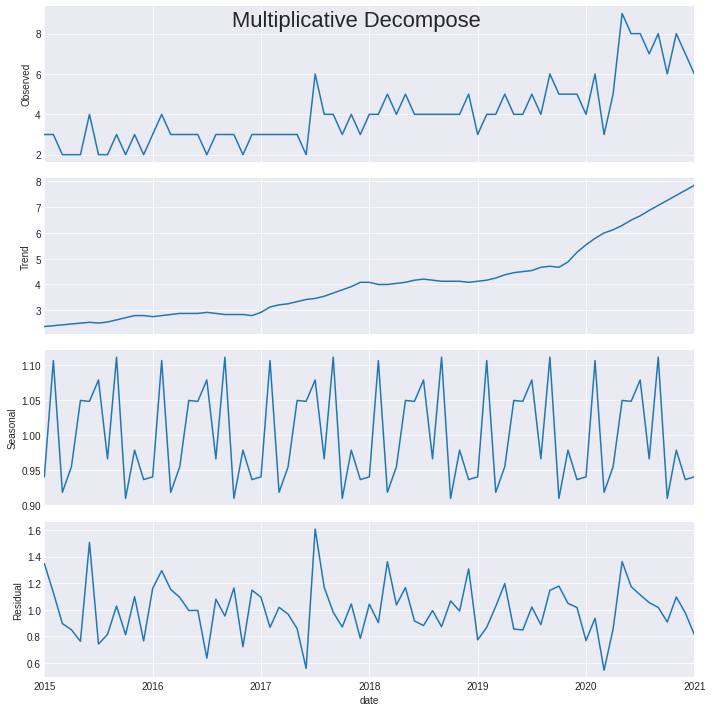

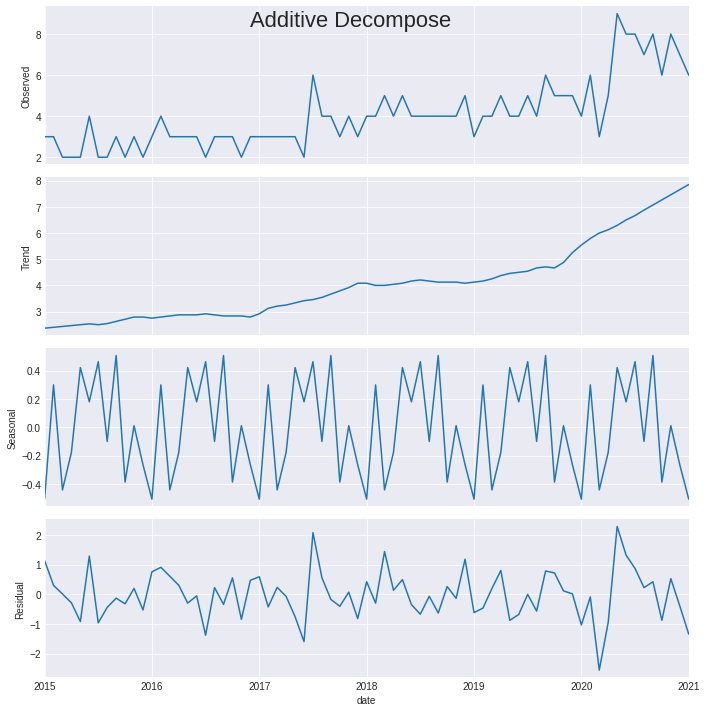

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

for kw in df:
  print(kw)
  # Multiplicative Decomposition 
  result_mul = seasonal_decompose(df[kw], model='multiplicative', extrapolate_trend='freq')

  # Additive Decomposition
  result_add = seasonal_decompose(df[kw], model='additive', extrapolate_trend='freq')

  # Plot
  plt.rcParams.update({'figure.figsize': (10,10)})
  result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
  result_add.plot().suptitle('Additive Decompose', fontsize=22)
  plt.show()

# Analyze each keyword

In [14]:
keyword_analyze = 'bathroom mirror' #@param {type:"string"}
top_x = 10 #@param {type:"slider", min:0, max:20, step:1}

interest_by_region[keyword_analyze].nlargest(top_x)

geoName
Australia     100
Bangladesh    100
Belgium       100
Canada        100
Czechia       100
Egypt         100
Finland       100
Greece        100
Hong Kong     100
Hungary       100
Name: bathroom mirror, dtype: int64

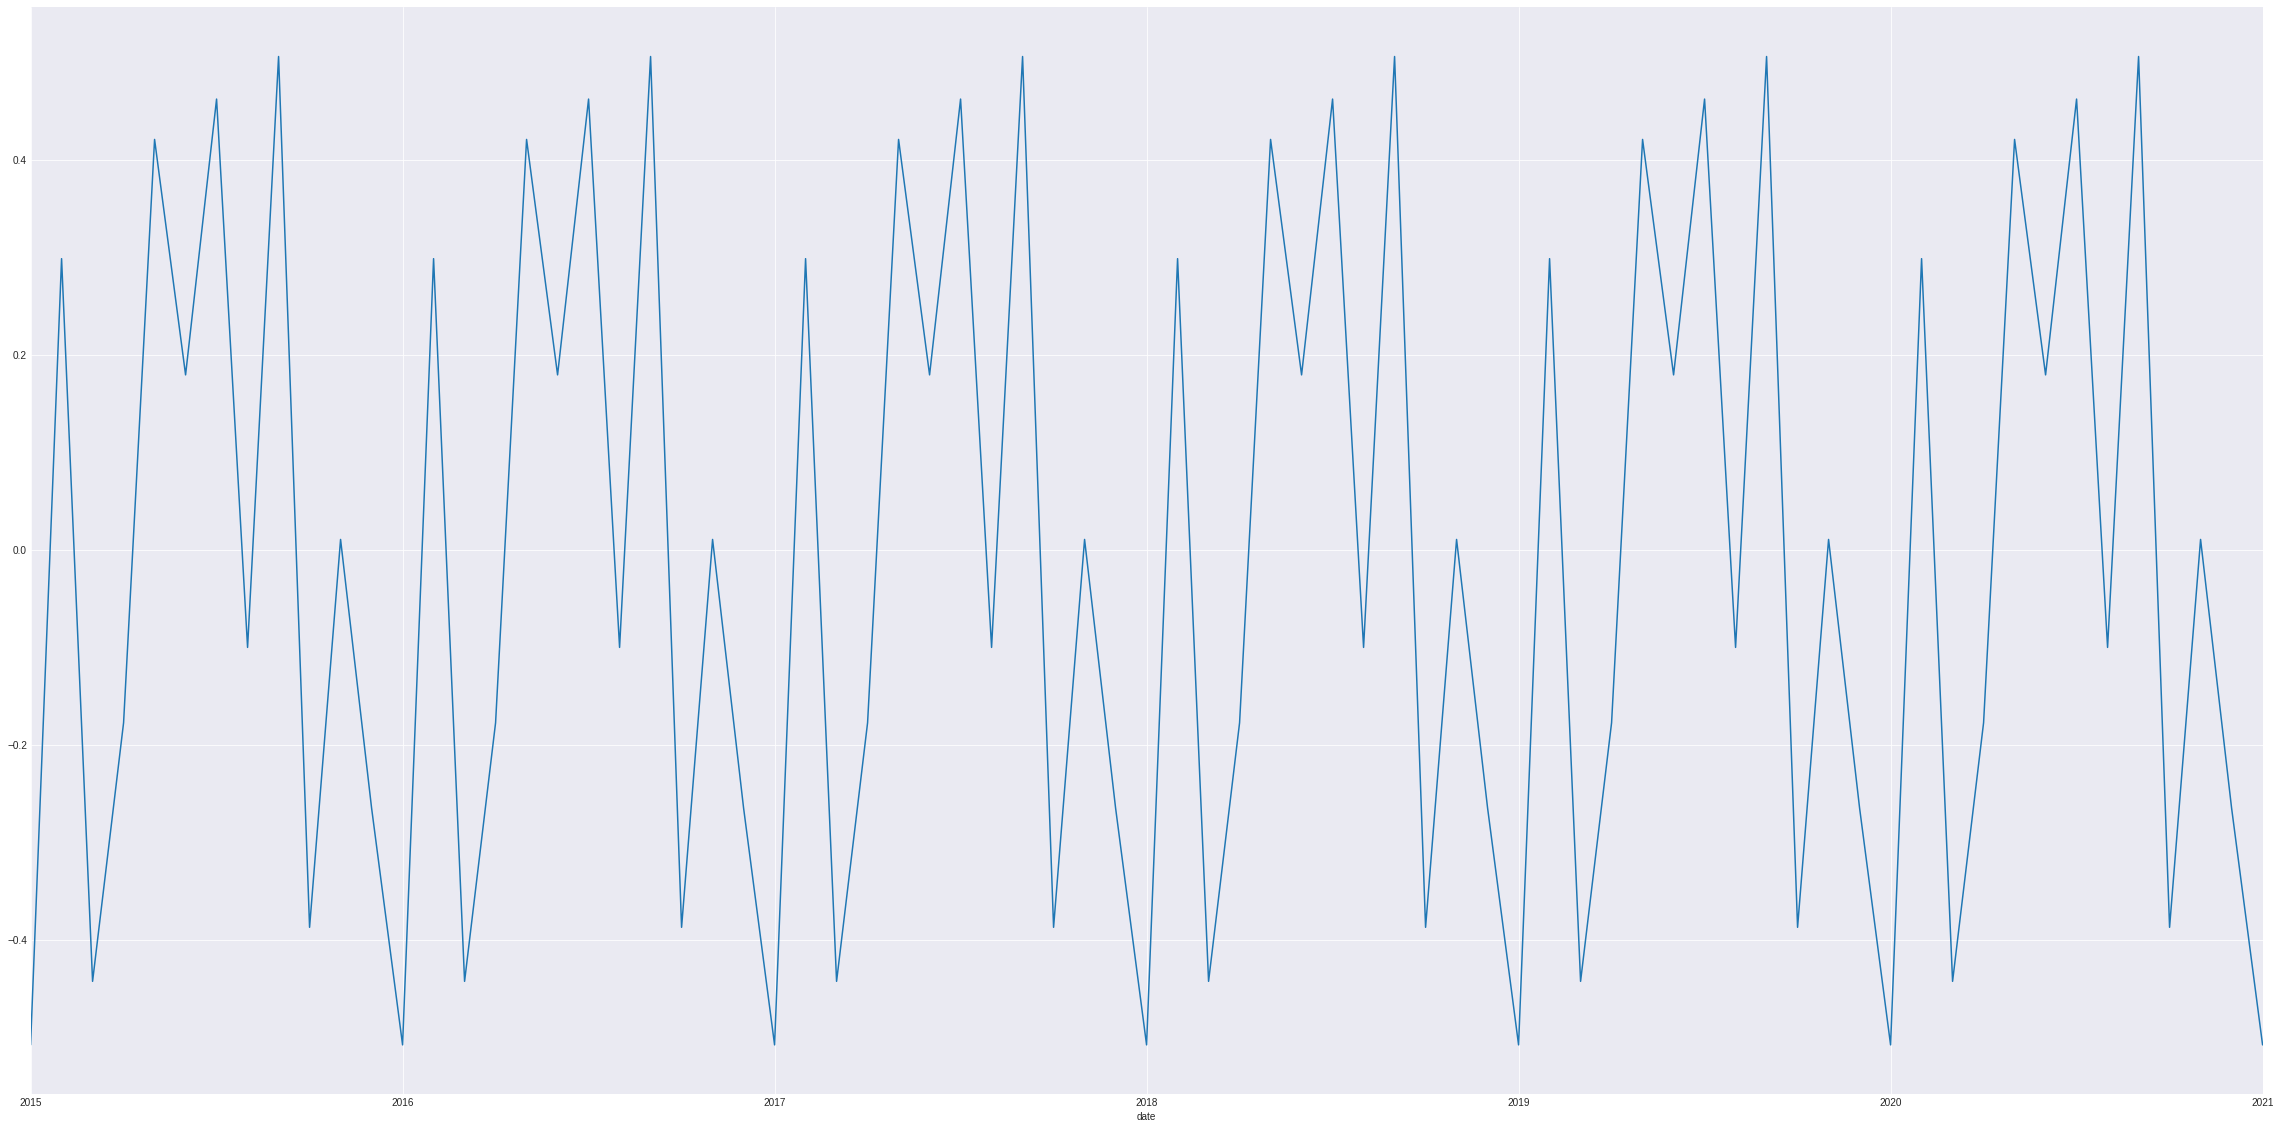

In [16]:
result_add.seasonal.plot(figsize=(40,20))

## Stationality from Gauss chart

mean1=bathroom mirror    51.854545
badspiegel          5.927273
espejo de baño      3.381818
dtype: float64, mean2=bathroom mirror    78.166667
badspiegel          7.666667
espejo de baño      6.111111
dtype: float64
var1=bathroom mirror    75.571044
badspiegel          1.846465
espejo de baño      0.907071
dtype: float64, var2=bathroom mirror    75.571044
badspiegel          1.846465
espejo de baño      0.907071
dtype: float64


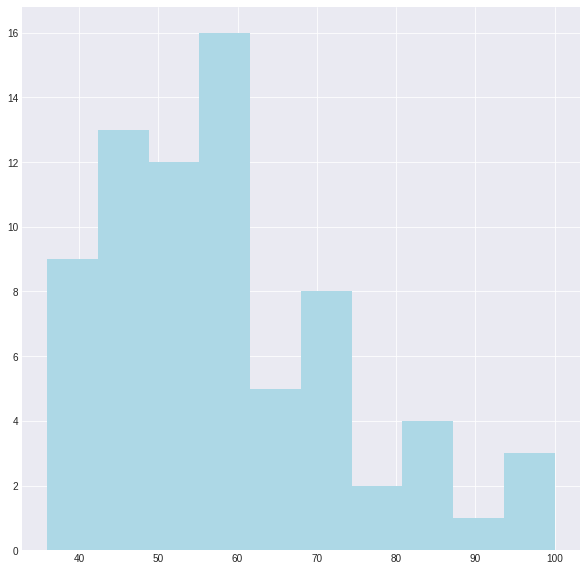

In [17]:
plt.hist(df[keyword_analyze], color="lightblue")
#Split the data
df1, df2=df[0:55], df[55:]
#Mean of data
mean1, mean2 = df1.mean(), df2.mean()
#Variance of data
var1, var2 = df1.var(), df2.var()
print(f'mean1={mean1}, mean2={mean2}' )
print(f'var1={var1}, var2={var1}')

## Check if a data set or time series is random by Lag Plots

Used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.

In [18]:
#show_lag_plot(df)

## Auto-correlation plot

Autocorrelation is the correlation of a variable with itself at differing time lags. 

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

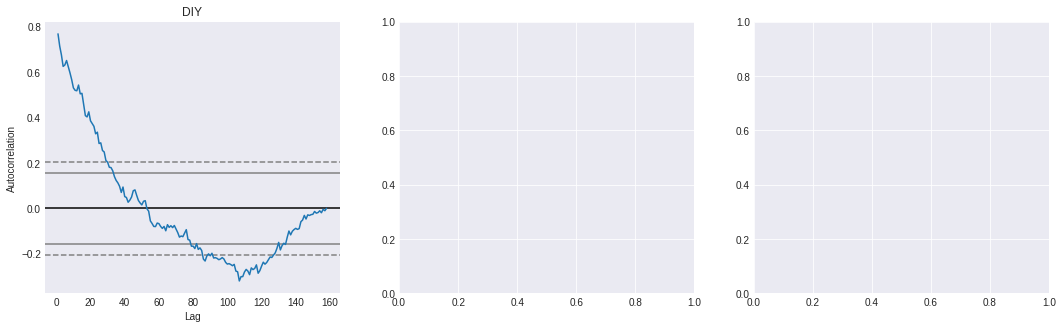

In [ ]:
from pandas.plotting import autocorrelation_plot

f3, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(18, 5))
#f3.tight_layout()

autocorrelation_plot(df[keyword_analyze], ax=ax7)
ax7.set_title('DIY');
'''
autocorrelation_plot(df["Toilet paper"], ax=ax8)
ax8.set_title('Toilet paper');

autocorrelation_plot(df["leroy merlin"], ax=ax9)
ax9.set_title('leroy merlin');'''

plt.show()


Correlation and Autocorrelation by Statsmodels Library


Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson correlation coefficient to summarize the correlation between the variables.

The Pearson correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

Below is an example of calculating and plotting the autocorrelation plot for the Minimum Daily Temperatures using the plot_acf() function from the statsmodels library.

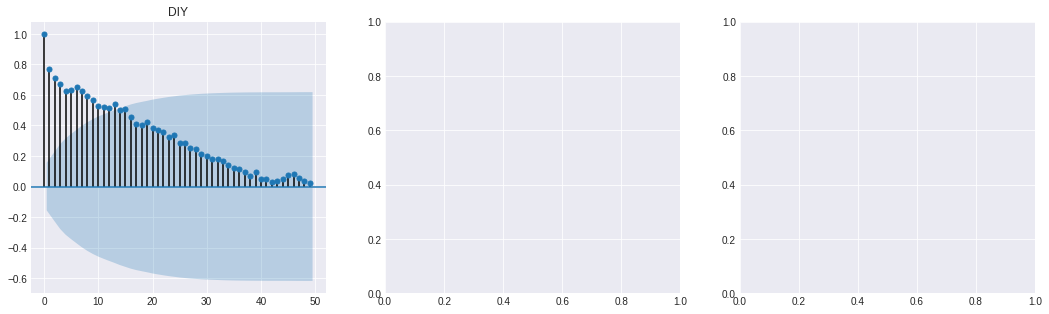

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

f1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
#f3.tight_layout()

plot_acf(df[keyword_analyze], ax=ax1, lags = range(0,50))
ax1.set_title('DIY')
'''
plot_acf(df["Toilet paper"], ax=ax2, lags = range(0, 20))
ax2.set_title('Toilet paper')

plot_acf(df["leroy merlin"], ax=ax3, lags = range(0, 5))     # note that max lags is 35
ax3.set_title('leroy merlin')'''

plt.show()

* https://www.machinelearningplus.com/time-series/time-series-analysis-python/
* https://github.com/2wavetech/How-to-Check-if-Time-Series-Data-is-Stationary-with-Python
* https://github.com/qztseng/google-trends-daily/blob/master/google%20Trend%20daily%20data%20for%20Brexit.ipynb


##Modelling the data

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(df[keyword_analyze], order=(50,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals

print(residuals.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
